<div style="background-color:black; color:white; padding:5px">
    <div margin-right: 1350px;">
        <p style="font-size: 26px; font: montserrat-bold; width: 100%; text-align: center;"><strong>HACKATHON</strong></p>
        <p style="font-size: 16px; font: montserrat; width: 100%;"><strong>Autores: Bárbara Ruiz, Daniel Pardo, Juan de la Morena y Miguel Ángel del Hoyo</strong></p>
    </div>
</div>

## <font color=#252973>Índice</font><td width="20">&nbsp;</td>

* [1. Librerías necesarias para trabajar](#librerias)

* [2. Obtención de datos](#datos)

* [3. Limpieza de los datos](#limpieza)
  
* [4. Análisis exploratorio de los datos](#AED)

* [5. Exploración y selección de modelos](#modelos)

* [6. Visualización del modelo](#visualizacion)

## <font color=#252973>1. Librerías necesarias para trabajar</font><a name="librerias">

En este apartado vamos a dejar indicadas todas las librerías que son necesarias para llevar el proyecto adelante, en lugar de andar cargándolas en cuanto vayan a hacer falta.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import csv

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Análisis Exploratorio de Datos
from ydata_profiling import ProfileReport

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Modelos de regresión
from sklearn.ensemble import IsolationForest, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Aprendizaje
import xgboost as xgb
from xgboost import XGBRegressor

# Redes Neuronales
from sklearn.neural_network import MLPRegressor

# Visualización
from github import GitHub

## <font color=#252973>2. Obtención de datos</font><a name="datos">

Para mantener la homogeneidad de los datos, vamos a respetar el nombre de la columna así como su contenido.

El dataset está en una única tabla, lo que nos va a facilitar el trabajo.

In [3]:
df_users = pd.read_csv('Archivos_proyecto/hackathon_startup_week.csv')

In [4]:
df_users.head()

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01 00:31:51,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01 00:41:45,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01 00:50:53,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01 01:32:28,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01 02:26:14,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43864 entries, 0 to 43863
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  43864 non-null  object 
 1   cc_num                 43864 non-null  int64  
 2   merchant               43864 non-null  object 
 3   category               43864 non-null  object 
 4   amt                    43864 non-null  float64
 5   trans_num              43864 non-null  object 
 6   unix_time              43864 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [6]:
df_users.describe()

,cc_num,amt,unix_time
count,4.386400e+04,43864.000000,4.386400e+04
mean,4.548320e+17,69.909544,1.359025e+09
std,1.352271e+18,151.838366,1.821349e+07
min,3.027043e+13,1.000000,1.325378e+09
25%,4.364011e+15,9.060000,1.343419e+09
50%,4.642255e+15,43.980000,1.357947e+09
75%,6.538442e+15,84.540000,1.374984e+09
max,4.512828e+18,17897.240000,1.388533e+09


De la tabla vemos que:
- <b>trans_date_trans_time</b>: Es la fecha en la que ha ocurrido la operación.
- <b>cc_num</b>: Es el identificador de la tarjeta bancaria.
- <b>merchant</b>: Es el comercio donde se ha hecho el gasto.
- <b>category</b>: Es la categorización del tipo de comercio.
- <b>amt</b>: Es la cantidad gastada.
- <b>trans_num</b>: Es el identificador de la transacción.
- <b>unix_time</b>: Es la fecha de la operación en formato Unix. Tiene una discordancia con la fecha de la operación, porque en la BBDD los datos son de 2019, pero en formato Unix son de 2012.

Dado que la columna a predecir es la cantidad, vamos a reordenar las columnas para hacer el dataframe con más sentido para operar.

In [7]:
orden_columnas = ['trans_num', 'amt', 'cc_num', 'trans_date_trans_time', 'merchant', 'category', 'unix_time']

df_users = df_users[orden_columnas]

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43864 entries, 0 to 43863
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_num              43864 non-null  object 
 1   amt                    43864 non-null  float64
 2   cc_num                 43864 non-null  int64  
 3   trans_date_trans_time  43864 non-null  object 
 4   merchant               43864 non-null  object 
 5   category               43864 non-null  object 
 6   unix_time              43864 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


## <font color=#252973>3. Limpieza de los datos</font><a name="limpieza">

Vamos a proceder ahora a la limpieza de datos. E iremos columna por columna.

### <font color=#d42f33>trans_num

Es un identificador. No vamos a hacer nada con él. Eliminamos la columna por irrelevante.

In [9]:
#df_users.drop('trans_num', axis=1, inplace=True)

### <font color=#d42f33>amt

En general noo hay valores NaN, ni raros, a excepción e un consumo de más de 17.000. Es la columna que vamos a tener como variable independiente para el modelo de machine learning y hacer las predicciones de los gastos.

In [10]:
valores_mas_de_3000 = df_users[df_users['amt'] > 3000]

# Imprimir los valores filtrados
print("Valores en la columna 'amt' por encima de 3000:")
print(valores_mas_de_3000)

Valores en la columna 'amt' por encima de 3000:
                              trans_num       amt               cc_num  \
4376   1c9f2b574fb9bf860c76ea200252fe05  17897.24     6538441737335434   
9309   3c45b826ec58a52b06420f400406e1c5   3596.40     4642255475285942   
13601  2ac39f655252ef661d35129ef3cc6ffc   4951.14     4904681492230012   
15891  3e3abc7b3ff72bc57b04ced2253f0a20   4304.22  4512828414983801773   
16664  1e026697c99db2ffd96ea05c4c3eaae3   3069.89     4364010865167176   
27691  52e82b07d350b0689d835cfa2e5034dc   4344.87     4642255475285942   
34093  693ea1da4a1eff4566120888cae2b783   3445.34     4904681492230012   
38169  3720d8aaf44d8f112df0d0fdc738ab61   5348.91       30270432095985   
39299  b69b7468ac1cb4202932a45cd4072f40   4093.22     4364010865167176   

      trans_date_trans_time                         merchant      category  \
4376    2019-04-07 15:32:23                      Tillman LLC        travel   
9309    2019-07-01 18:50:37                       Terry

### <font color=#d42f33>cc_num

Está puesto como valor numérico pero lo tenemos que pasar a objeto. Es el número de tarjeta bancaria.

In [11]:
df_users['cc_num'] = df_users['cc_num'].astype(object)
print(df_users['cc_num'].dtype)

object


In [12]:
conteo_cc_num = df_users['cc_num'].value_counts()
conteo_cc_num

30270432095985         4392
6538441737335434       4392
4642255475285942       4386
4364010865167176       4386
6538891242532018       4386
6011438889172900       4385
344709867813900        4385
4512828414983801773    4384
4586810168620942       4384
4904681492230012       4384
Name: cc_num, dtype: int64

In [13]:
# Vemos la cantidad gastada por cada tarjeta

amt_cc = df_users.groupby('cc_num')['amt'].sum().sort_values()
amt_cc

cc_num
4364010865167176       209986.08
30270432095985         248056.36
4512828414983801773    250072.42
4642255475285942       259319.63
4904681492230012       266455.17
4586810168620942       319819.10
6538441737335434       336174.28
6538891242532018       383817.40
344709867813900        391922.65
6011438889172900       400889.15
Name: amt, dtype: float64

### <font color=#d42f33>trans_date_trans_time

Aquí tenemos una columna con mucha información que nos interesa dividir. Voy a dividirlo en las siguientes columnas: Año, Mes, Día y Hora.

In [14]:
df_users['trans_date_trans_time'] = pd.to_datetime(df_users['trans_date_trans_time'])
df_users['Año'] = df_users['trans_date_trans_time'].dt.year
df_users['Mes'] = df_users['trans_date_trans_time'].dt.month
df_users['Día'] = df_users['trans_date_trans_time'].dt.day
df_users['Hora'] = df_users['trans_date_trans_time'].dt.time
df_users.drop(columns=['trans_date_trans_time'], inplace=True)

In [15]:
def get_momento_del_dia(Hora):
    if 5 <= Hora.hour < 12:
        return 'mañana'
    elif 12 <= Hora.hour < 20:
        return 'tarde'
    else:
        return 'noche'

df_users['momento_del_dia'] = df_users['Hora'].apply(get_momento_del_dia)
print(df_users.head())

                          trans_num     amt               cc_num  \
0  47238da5b40d126c8abea40a857c7809  102.13     4642255475285942   
1  048dc7fc7ae8efd51f59f7176e6a8bd7  177.57     4642255475285942   
2  514a1b5251ca91aeab8994cf6253f04b   16.16  4512828414983801773   
3  895bfdf48e8c52d12f11b180712438fa    3.66       30270432095985   
4  56bf02cc990fffa7866794be63472528   61.99     4364010865167176   

                      merchant       category   unix_time   Año  Mes  Día  \
0          Ledner-Pfannerstill  gas_transport  1325377911  2019    1    1   
1               Huel-Langworth       misc_net  1325378505  2019    1    1   
2            Jaskolski-Dibbert    grocery_net  1325379053  2019    1    1   
3  Herman, Treutel and Dickens       misc_net  1325381548  2019    1    1   
4                   Huels-Hahn  gas_transport  1325384774  2019    1    1   

       Hora momento_del_dia  
0  00:31:51           noche  
1  00:41:45           noche  
2  00:50:53           noche  
3  01:32

No tenemos NaN ni parece que haya valores problemáticos. Pasamos a la siguiente columna.

### <font color=#d42f33>merchant

Vamos a revisar si hay algún dato particular en la columna. Pero no parece haber nada, puesto que el más recurrente solo aparece 146 veces.

In [16]:
conteo_merchant = df_users['merchant'].value_counts()
conteo_merchant

Cormier LLC                       146
Kilback LLC                       137
Kuhn LLC                          137
Dickinson Ltd                     126
Boyer PLC                         123
                                 ... 
Lemke and Sons                     16
Medhurst, Labadie and Gottlieb     15
Kris-Kertzmann                     13
Douglas, DuBuque and McKenzie      13
Schroeder, Wolff and Hermiston     10
Name: merchant, Length: 693, dtype: int64

### <font color=#d42f33>category

Hacemos un conteo para ver lo que tenemos aquí también.

In [17]:
conteo_category = df_users['category'].value_counts()
conteo_category

gas_transport     4420
shopping_pos      4278
shopping_net      3600
grocery_pos       3547
home              3540
kids_pets         3520
personal_care     3386
food_dining       3285
entertainment     3122
misc_pos          2927
health_fitness    2688
misc_net          2397
grocery_net       2071
travel            1083
Name: category, dtype: int64

### <font color=#d42f33>unix_time

En esta celda hemos visto que hay una disparidad respecto a las fechas de unix_time y de las fechas indicadas. Para ver el día de la semana concreto vamos a ver el día de la semana concreto.

In [18]:
unix_time_datetime = pd.to_datetime(df_users['unix_time'], unit='s')
df_users['weekday'] = unix_time_datetime.dt.day_name()

In [19]:
# Vemos la cantidad de transacciones por día de la semana

dia_trans = df_users.groupby('weekday')['trans_num'].count().sort_values()
dia_trans

weekday
Monday       4008
Tuesday      4336
Wednesday    4721
Thursday     4932
Friday       7766
Sunday       8516
Saturday     9585
Name: trans_num, dtype: int64

In [20]:
# Cantidad gastada por cada día de la semana 

dia_amt = df_users.groupby('weekday')['amt'].sum().sort_values()
dia_amt

weekday
Monday       278212.97
Tuesday      300742.43
Thursday     337598.99
Wednesday    348781.20
Friday       540914.79
Sunday       615772.61
Saturday     644489.25
Name: amt, dtype: float64

### <font color=#d42f33>Transacciones recurrentes

In [21]:
def compras_recurrentes(df, criteria1='merchant', criteria2='amt', frequency_threshold=1):
    grouped = df.groupby([criteria1, criteria2])
    
    # Creamos un dataframe que incluya compras recurrentes por cada grupo
    contar_compras_recurrentes = grouped.size().reset_index(name='count')
    
    # Filtramos los grupos con un recuento mayor o igual al umbral de frecuencia.
    contar_compras_recurrentes = contar_compras_recurrentes[contar_compras_recurrentes['count'] >= frequency_threshold]
    
    return contar_compras_recurrentes

contar_compras_recurrentes = compras_recurrentes(df_users, criteria1='merchant', criteria2='amt', frequency_threshold=3)
contar_compras_recurrentes

,merchant,amt,count
17666,Jacobi and Sons,8.40,3
23190,"Labadie, Treutel and Bode",8.34,4
41216,"Watsica, Haag and Considine",6.45,3


In [22]:
ruta_archivo_csv = 'Archivos_proyecto/hackathon_ordenado.csv'

df_users.to_csv(ruta_archivo_csv, index=False)

datos_recuperados = pd.read_csv(ruta_archivo_csv)
print(datos_recuperados.head())

                          trans_num     amt               cc_num  \
0  47238da5b40d126c8abea40a857c7809  102.13     4642255475285942   
1  048dc7fc7ae8efd51f59f7176e6a8bd7  177.57     4642255475285942   
2  514a1b5251ca91aeab8994cf6253f04b   16.16  4512828414983801773   
3  895bfdf48e8c52d12f11b180712438fa    3.66       30270432095985   
4  56bf02cc990fffa7866794be63472528   61.99     4364010865167176   

                      merchant       category   unix_time   Año  Mes  Día  \
0          Ledner-Pfannerstill  gas_transport  1325377911  2019    1    1   
1               Huel-Langworth       misc_net  1325378505  2019    1    1   
2            Jaskolski-Dibbert    grocery_net  1325379053  2019    1    1   
3  Herman, Treutel and Dickens       misc_net  1325381548  2019    1    1   
4                   Huels-Hahn  gas_transport  1325384774  2019    1    1   

       Hora momento_del_dia weekday  
0  00:31:51           noche  Sunday  
1  00:41:45           noche  Sunday  
2  00:50:53   

In [23]:
df_users = df_users.drop_duplicates()

In [24]:
print(df_users.info())
print(df_users.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43864 entries, 0 to 43863
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trans_num        43864 non-null  object 
 1   amt              43864 non-null  float64
 2   cc_num           43864 non-null  object 
 3   merchant         43864 non-null  object 
 4   category         43864 non-null  object 
 5   unix_time        43864 non-null  int64  
 6   Año              43864 non-null  int64  
 7   Mes              43864 non-null  int64  
 8   Día              43864 non-null  int64  
 9   Hora             43864 non-null  object 
 10  momento_del_dia  43864 non-null  object 
 11  weekday          43864 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 4.4+ MB
None
                amt     unix_time           Año           Mes           Día
count  43864.000000  4.386400e+04  43864.000000  43864.000000  43864.000000
mean      69.909544  1.35902

## <font color=#252973>4. Análisis exploratorio de los datos</font><a name="AED">

### <font color=#d42f33>Informe YData Profiling

Una vez hecha la limpieza de los datos, vamos con el análisis exploratorio. Para ello vamos a utilizar YData Profiling.

In [25]:
path_2 = 'Archivos_proyecto/'
report = ProfileReport(df_users, title='Users_Report')
report.to_file(output_file = path_2 + "Users_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Este informe nos da un primer vistazo de cómo se encuentran las variables, más allá de lo que podemos ver con el "info" y el "describe" en los dataframes. Se encuentra en la carpeta "Archivos_proyecto".

### <font color=#d42f33>Variables numéricas

En los siguientes gráficos vamos a ver cómo se encuentran repartidos los valores de las columnas numéricas y los posibles outliers que podría haber.

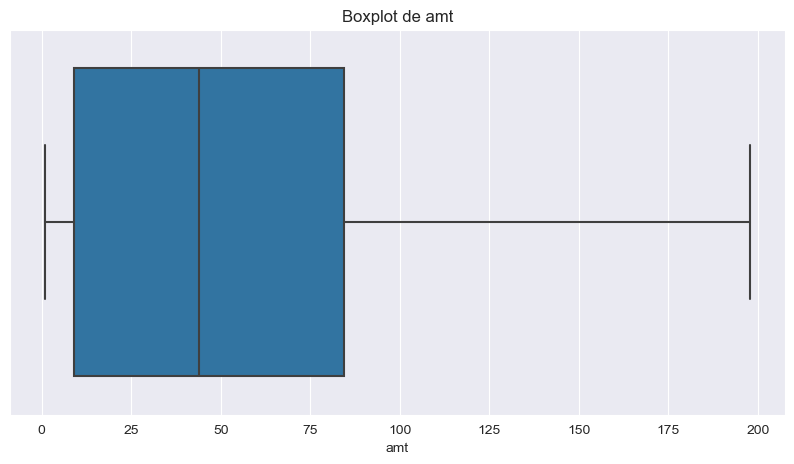

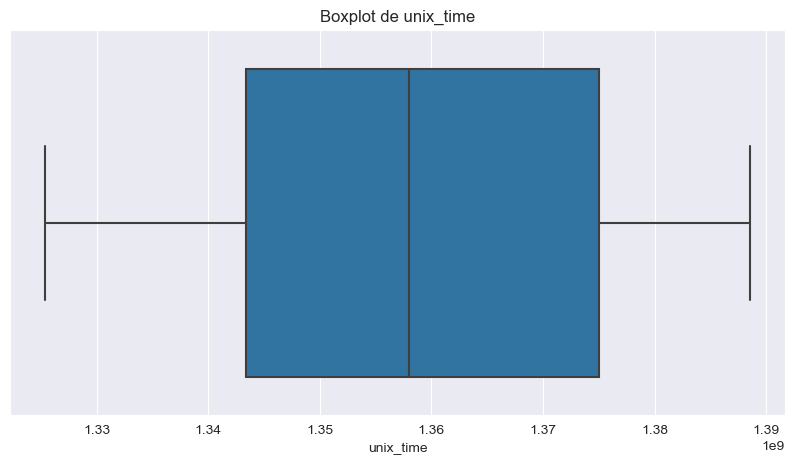

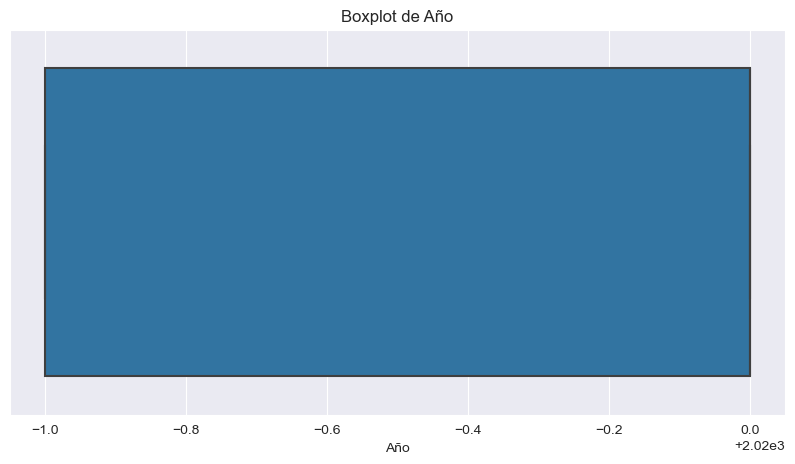

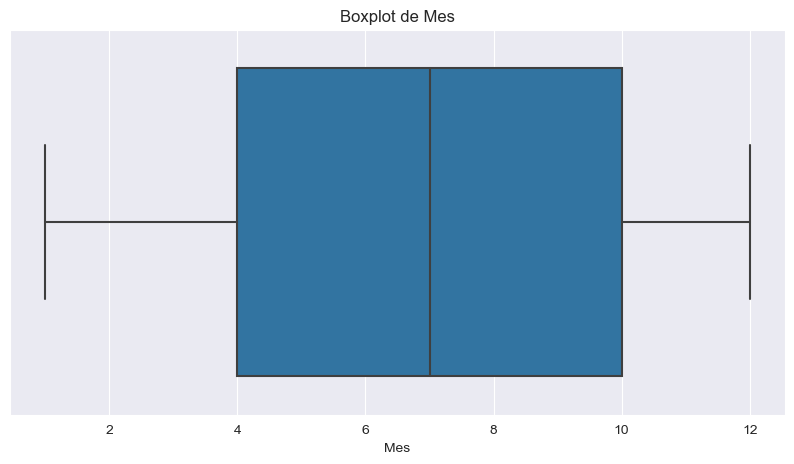

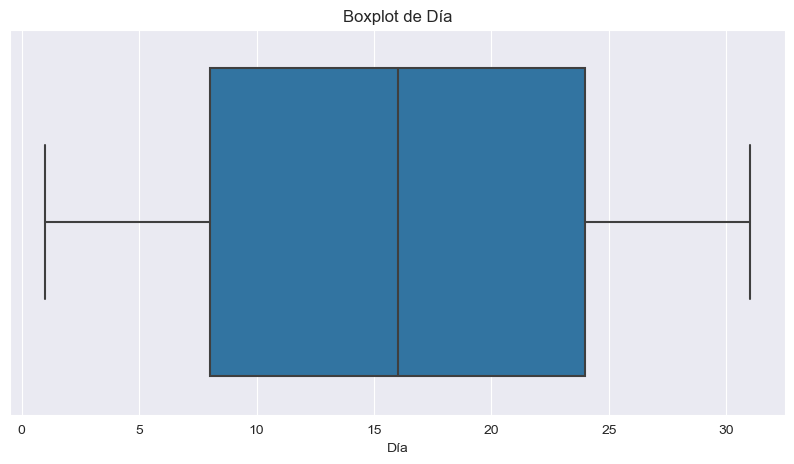

In [26]:
df_numeric = df_users.select_dtypes(include=[np.number, bool])
numeric_list = list(df_numeric.columns)

sns.set_style("darkgrid")

for col in numeric_list:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_users[col], showfliers=False)
    plt.title(f'Boxplot de {col}')
    plt.show()

Hacemos un heatmap para ver la correlación entre las variables numéricas.

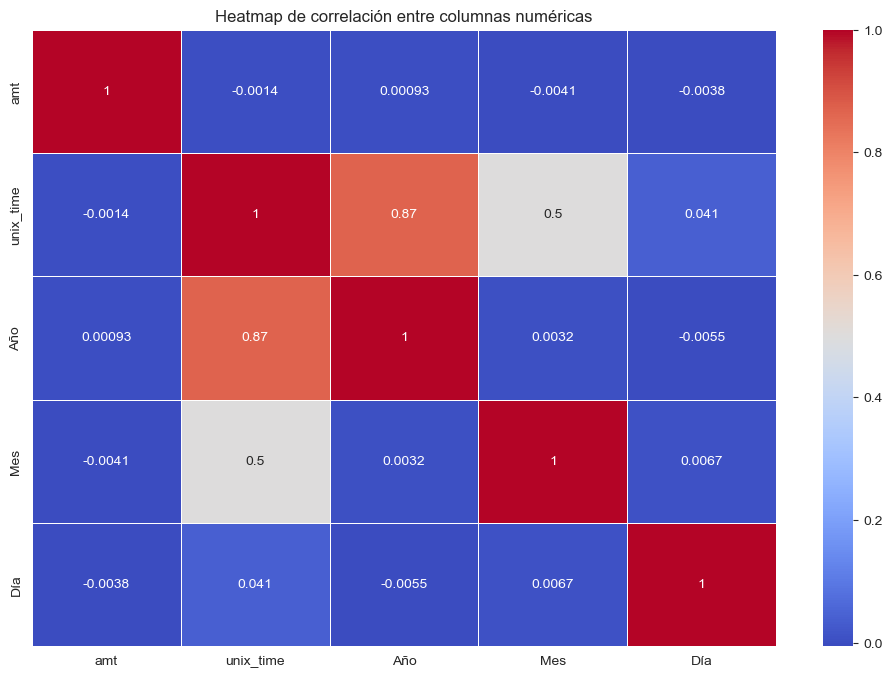

In [27]:
corr_matrix_numerica = df_users[numeric_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numerica, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de correlación entre columnas numéricas")
plt.show()

Podemos ver que la mayor correlación con el <b>amt</b> la tiene, en sentido positivo, la columna <b>Año</b>. Y después la columna <b>bed</b>. Mientras que en sentido inverso tenemos la columna <b>Mes</b>. Pero las correlaciones son mínimas.

Pero además de ver las variables numéricas en boxplot vamos a ver los histogramas de las variables categóricas, para ver la distribución de frecuencias, y lo vamos a "enfrentar" con la variable <b>amt</b>, puesto que es lo que queremos predecir.

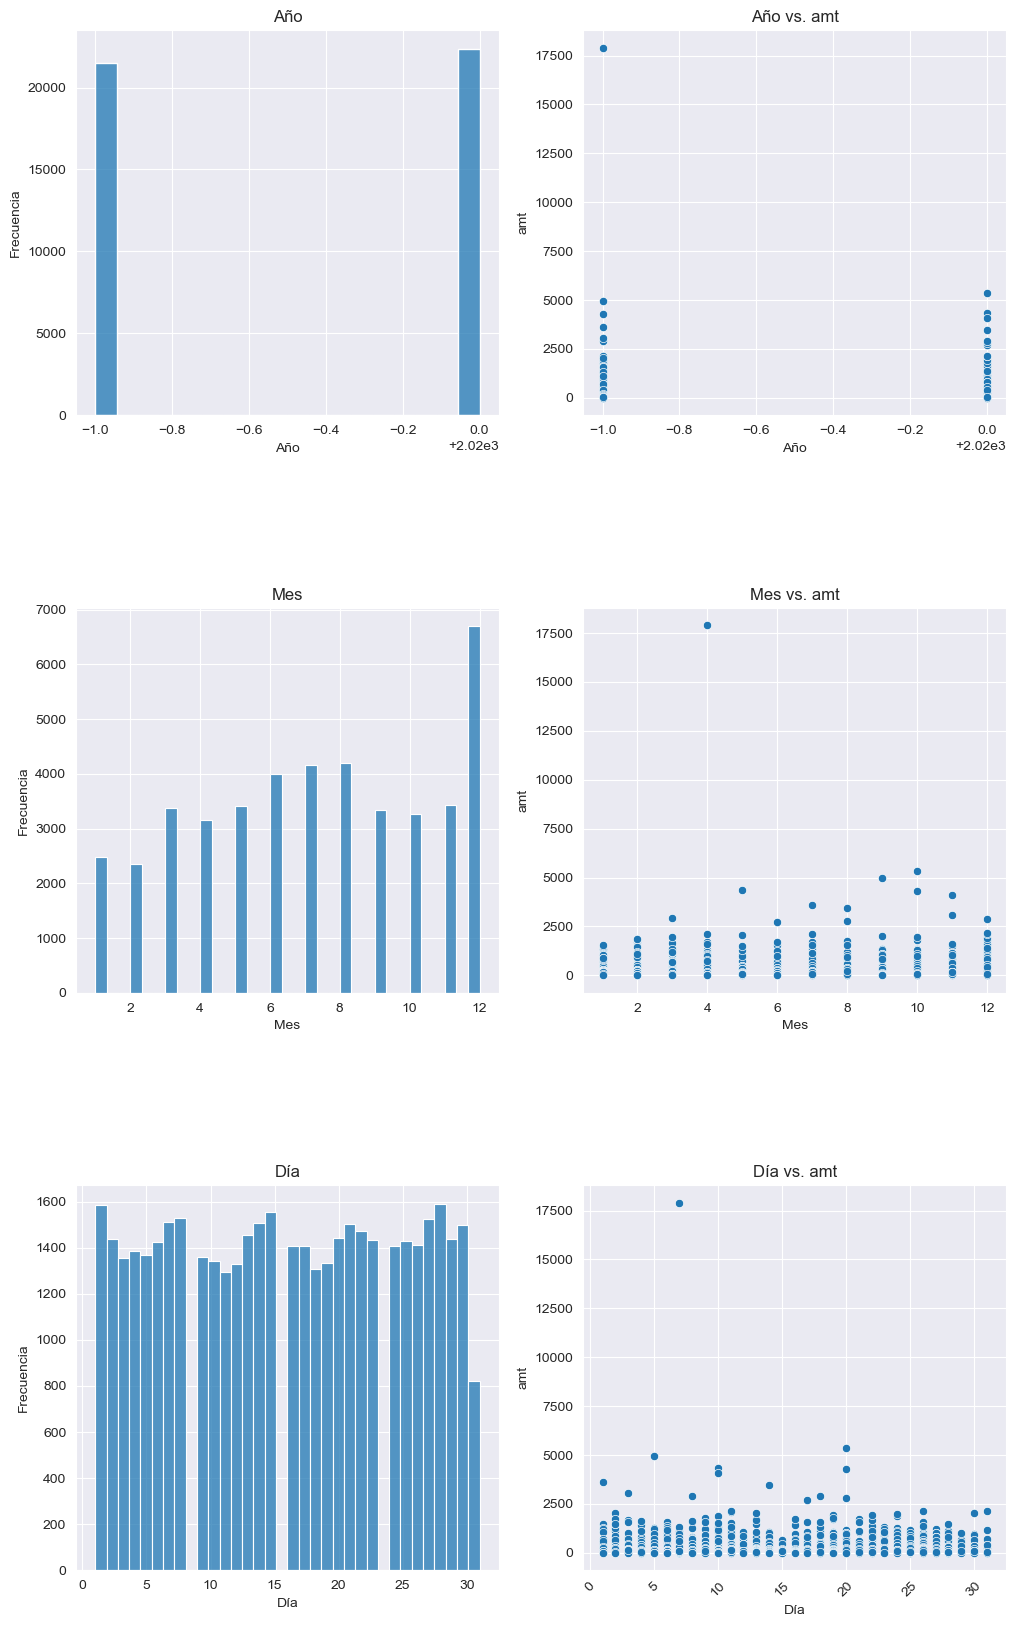

In [28]:
# Creamos subplots para cada variable por separado
num_cols = ['Año', 'Mes', 'Día']

# Configuramos el tamaño de la figura y el número de filas y columnas de subplots
filas, columnas = 3, 2
fig, axes = plt.subplots(filas, columnas, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

# Iterando creamos los gráficos
for i, col in enumerate(num_cols[:6]):
    #Gráfico de cada variable por separado
    sns.histplot(data=df_users, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frecuencia')

    #Gráfico de dispersión cruzando la variable con "amt"
    sns.scatterplot(data=df_users, x=col, y='amt', ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} vs. amt')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('amt')
    plt.xticks(rotation=45)

# Mostrar los gráficos
plt.xticks(rotation=45)
plt.show()

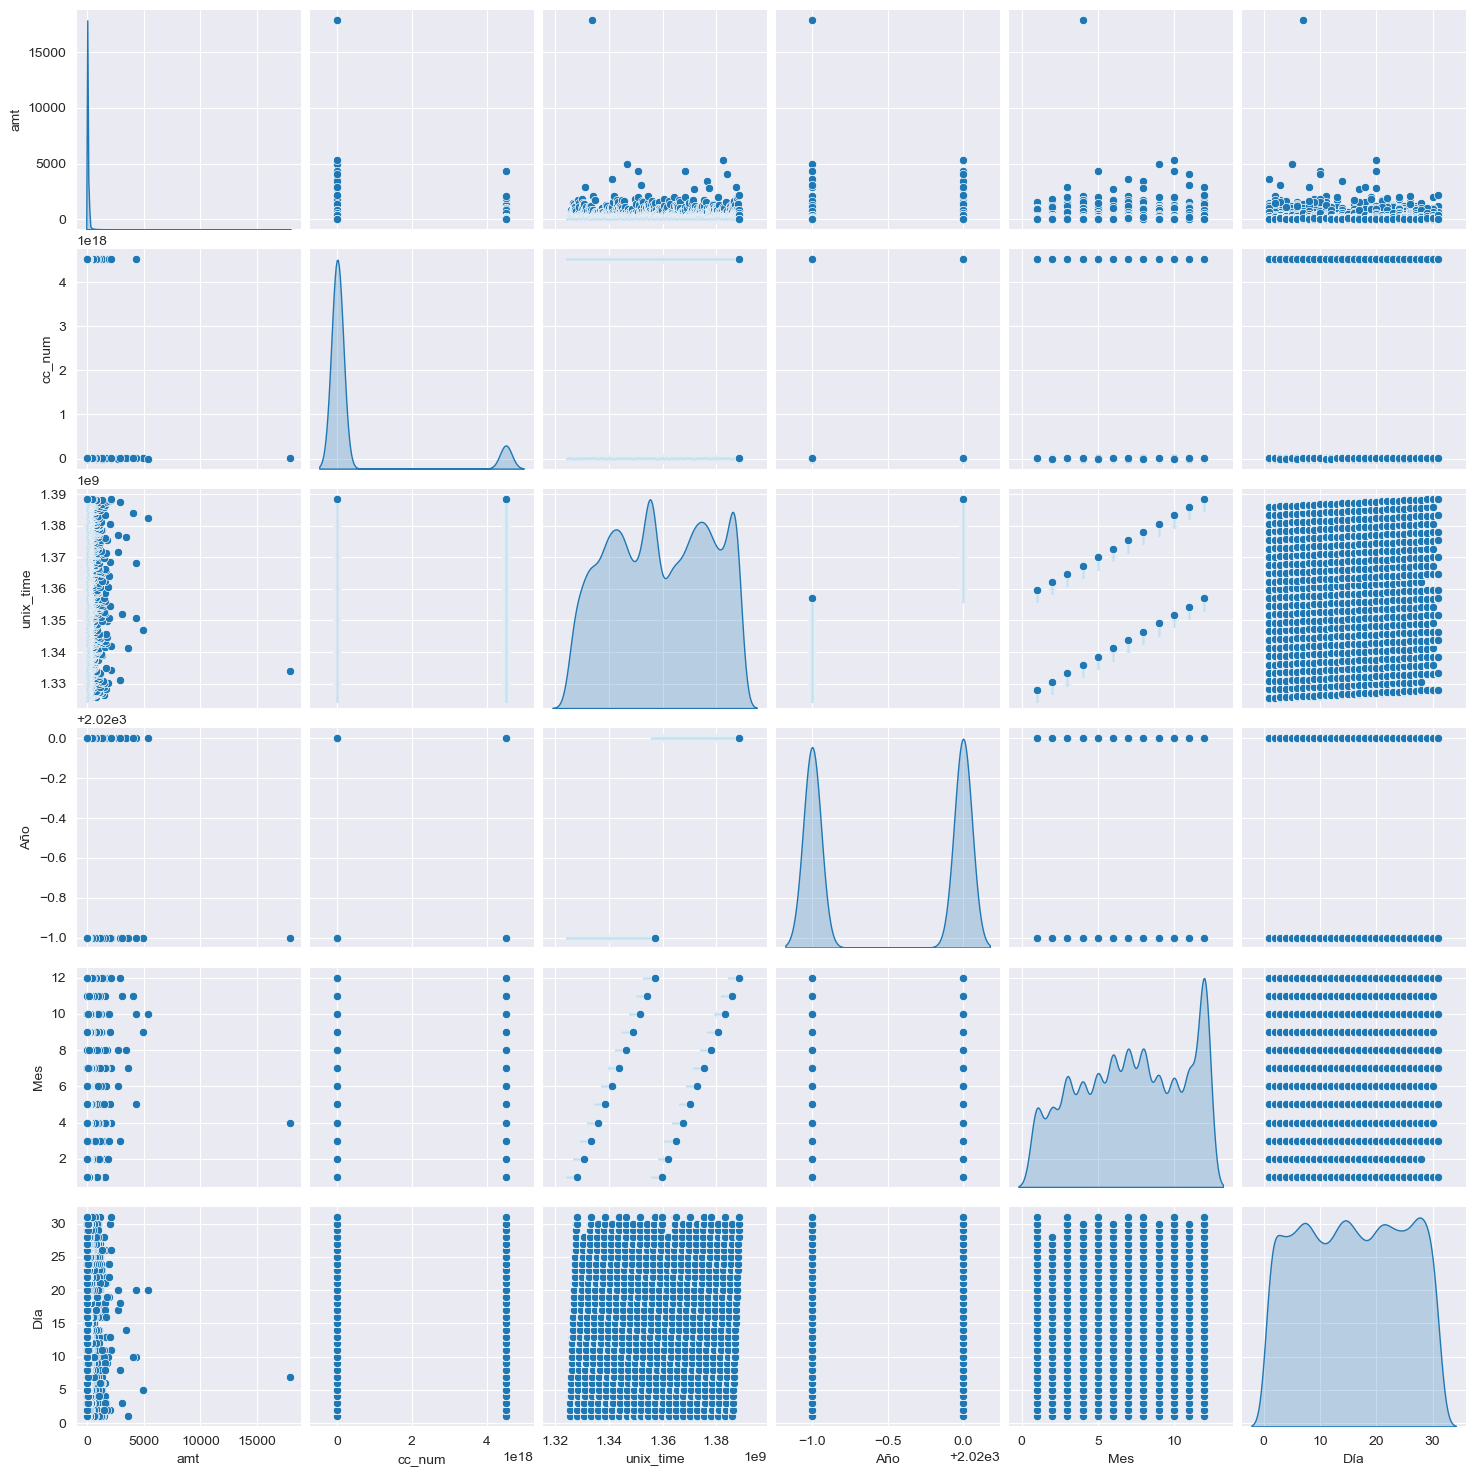

In [29]:
sns.pairplot(df_users, diag_kind='kde')
plt.show()

No hay segmentaciones claras entre las numéricas. Veamos qué obtenemos entre las categóricas. Vamos primero con histogramas y después hacemos la representación en relación al precio.

### <font color=#d42f33>Variables categóricas

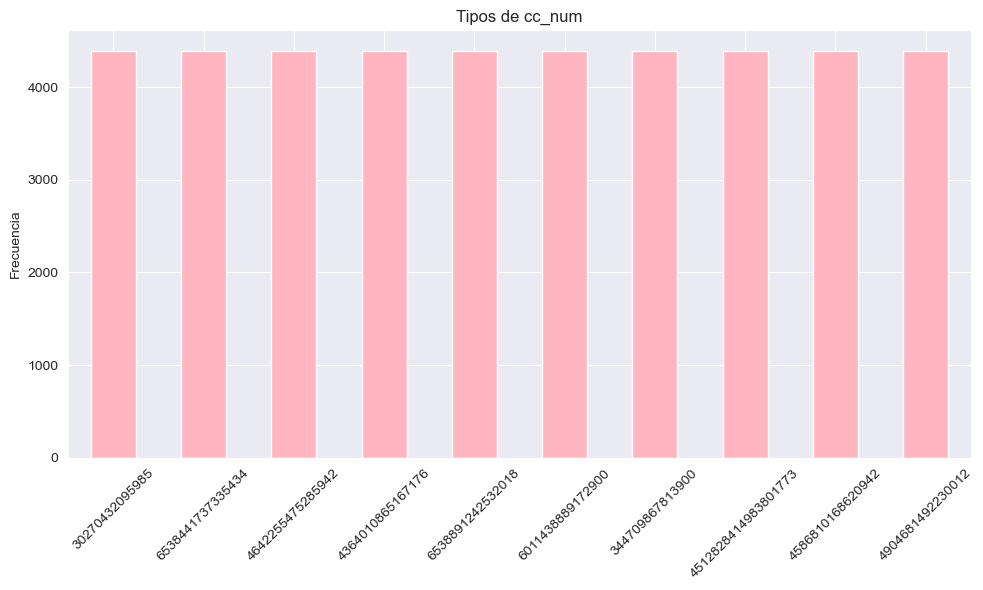

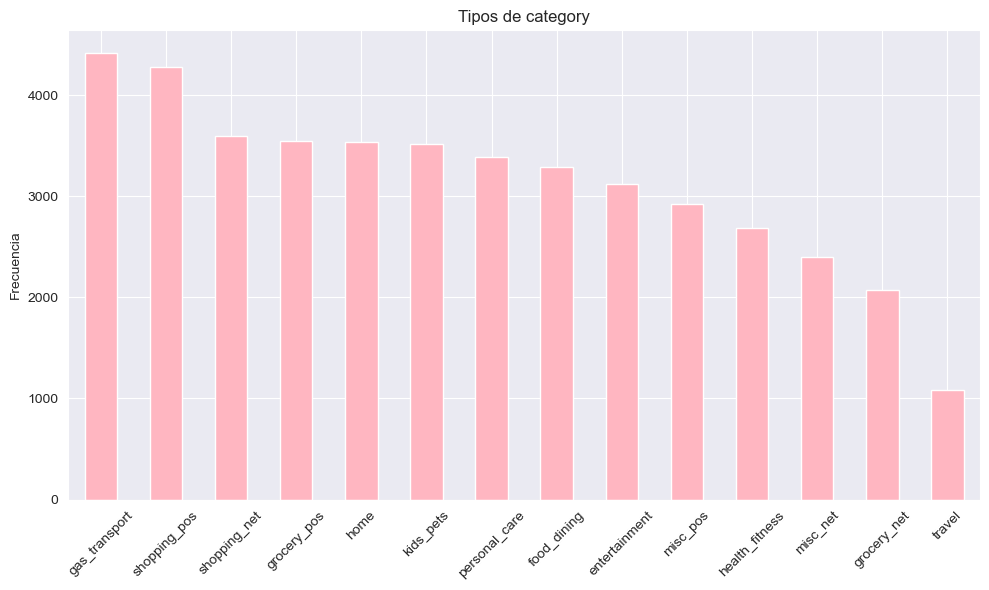

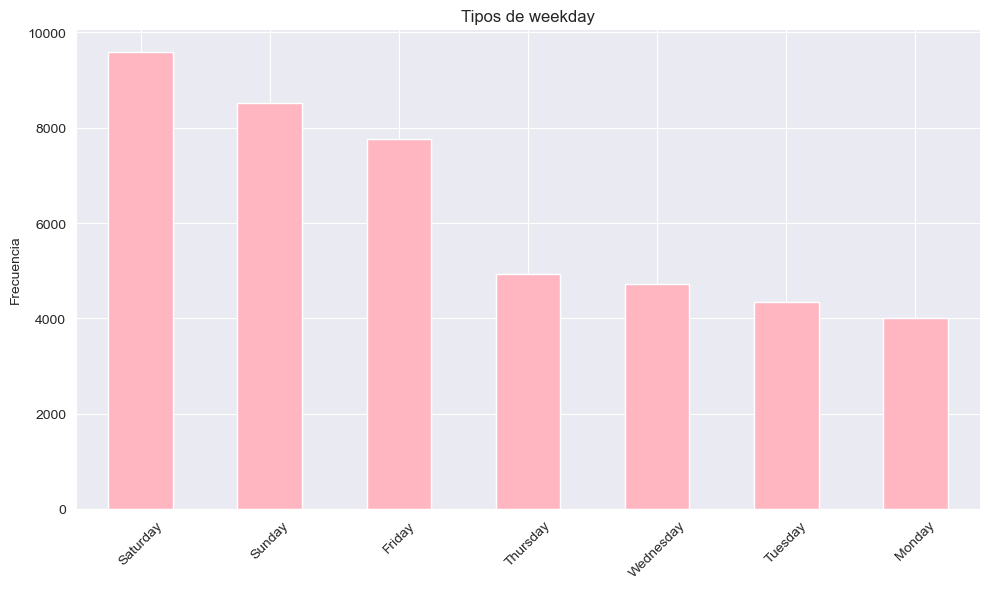

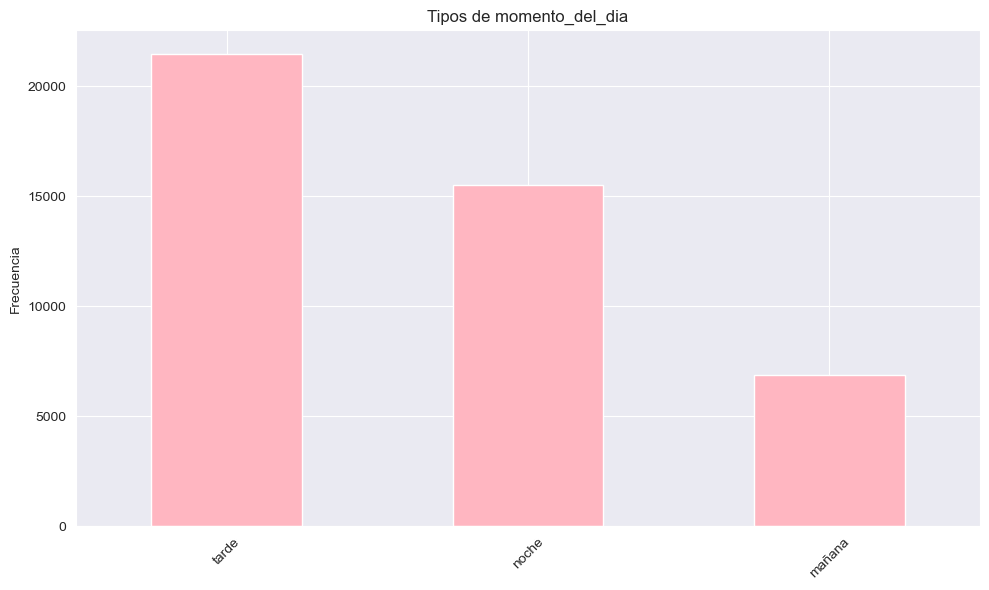

In [30]:
categ_list = ['cc_num', 'category', 'weekday', 'momento_del_dia']

# Iteramos sobre las columnas categóricas y para crear los histogramas de cada una
for col in categ_list:
    frecuencia_categorias = df_users[col].value_counts()
    
    plt.figure(figsize=(10, 6))
    frecuencia_categorias.plot(kind='bar', color='lightpink')
    
    plt.ylabel('Frecuencia')
    plt.title(f'Tipos de {col}')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

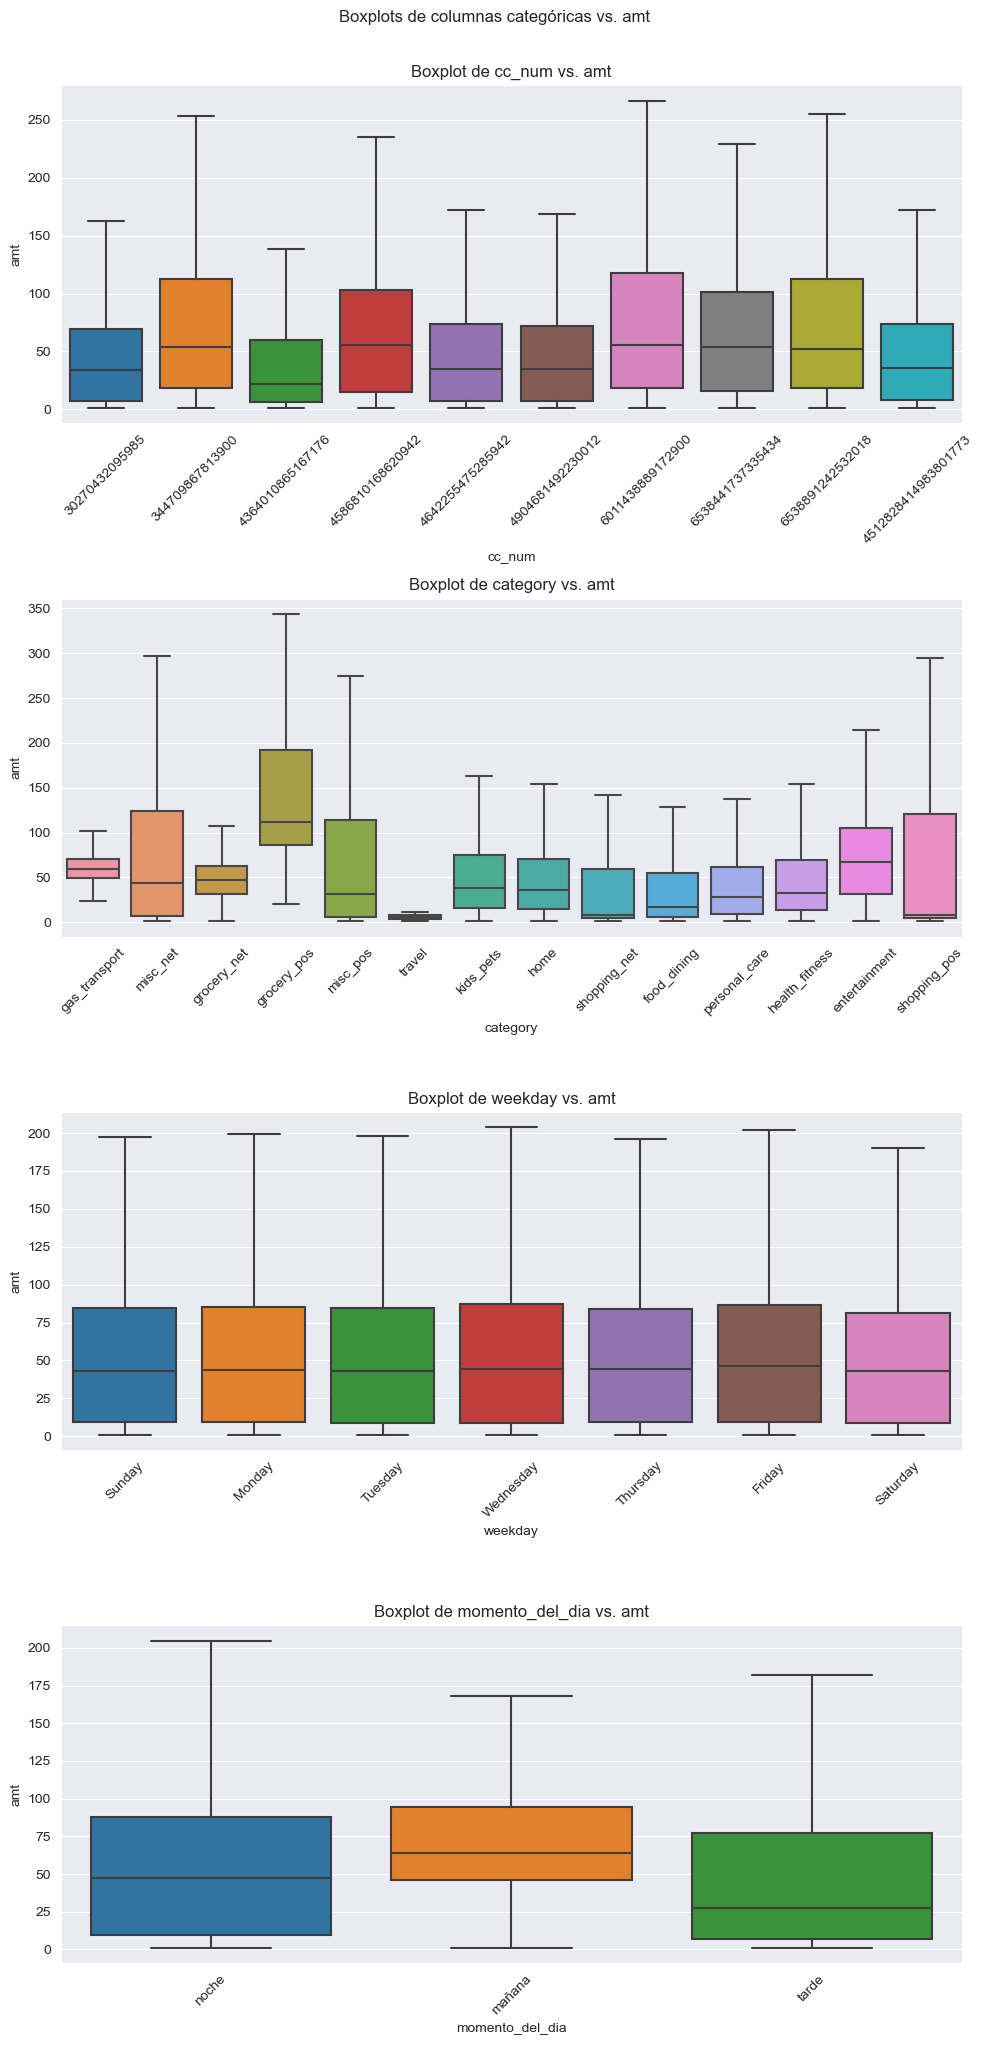

In [31]:
filas, columnas = 4, 1
fig, axs = plt.subplots(filas, columnas, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(categ_list):
    sns.boxplot(data=df_users, x=col, y='amt', ax=axs[i], showfliers=False)
    axs[i].set_title(f'Boxplot de {col} vs. amt')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.suptitle('Boxplots de columnas categóricas vs. amt', y=1.02)
plt.show()

### <font color=#d42f33>Tratamiento de variables categóricas

Con las variables categóricas tenemos un problema a la hora de hacer aprendizaje profundo (deep learning) o machine learning. Necesitamos variables numéricas. Por ello tenemos que trabajar con las variables.

En el caso de la variable <b>propType</b> sí que podemos dar un valor ordinal a la variable, puesto que hemos visto cómo hay variables que tenían mayor valor en función del tipo de propiedad que se tratase. Con la variable <b>Season</b> eso no va a ser posible, puesto que no hay un valor mayor o menos en función de la estación del año que sea.

Y ahora hacer los "dummies" para poder trabajar con la variable <b>Season</b> para los modelos de regresión. Lo que hacemos es crear 4 nuevas variables en función del valor categorizado y dar el valor 0 o 1 en función de cuál sea el valor de la variable categórica.

In [32]:
dfv_dum = pd.get_dummies(df_users, columns=['cc_num', 'category', 'weekday', 'momento_del_dia'])
dfv_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43864 entries, 0 to 43863
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trans_num                   43864 non-null  object 
 1   amt                         43864 non-null  float64
 2   merchant                    43864 non-null  object 
 3   unix_time                   43864 non-null  int64  
 4   Año                         43864 non-null  int64  
 5   Mes                         43864 non-null  int64  
 6   Día                         43864 non-null  int64  
 7   Hora                        43864 non-null  object 
 8   cc_num_30270432095985       43864 non-null  uint8  
 9   cc_num_344709867813900      43864 non-null  uint8  
 10  cc_num_4364010865167176     43864 non-null  uint8  
 11  cc_num_4586810168620942     43864 non-null  uint8  
 12  cc_num_4642255475285942     43864 non-null  uint8  
 13  cc_num_4904681492230012     438

### <font color=#d42f33>Matriz de correlación

Y, por último, vemos cómo queda la matriz de correlación.

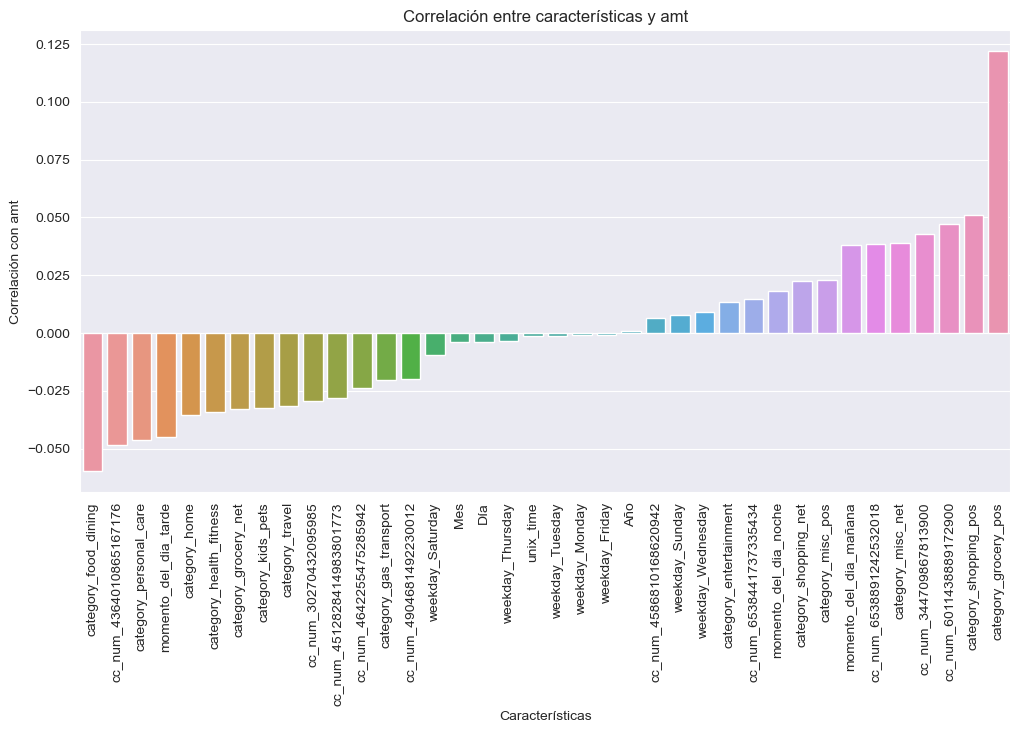

In [33]:
# Filtramos solo las columnas numéricas
dfv_numeric = dfv_dum.select_dtypes(include=[np.number, bool])

# Calculamos la matriz de correlación
corr_matrix = dfv_numeric.corr()

# Filtramos la correlación con la columna "sellPrice" y excluimos la correlación consigo misma
amt_corr = corr_matrix['amt'].sort_values().drop('amt')

plt.figure(figsize=(12, 6))
sns.barplot(x=amt_corr.index, y=amt_corr.values)
plt.xticks(rotation=90)
plt.title("Correlación entre características y amt")
plt.xlabel("Características")
plt.ylabel("Correlación con amt")
plt.show()

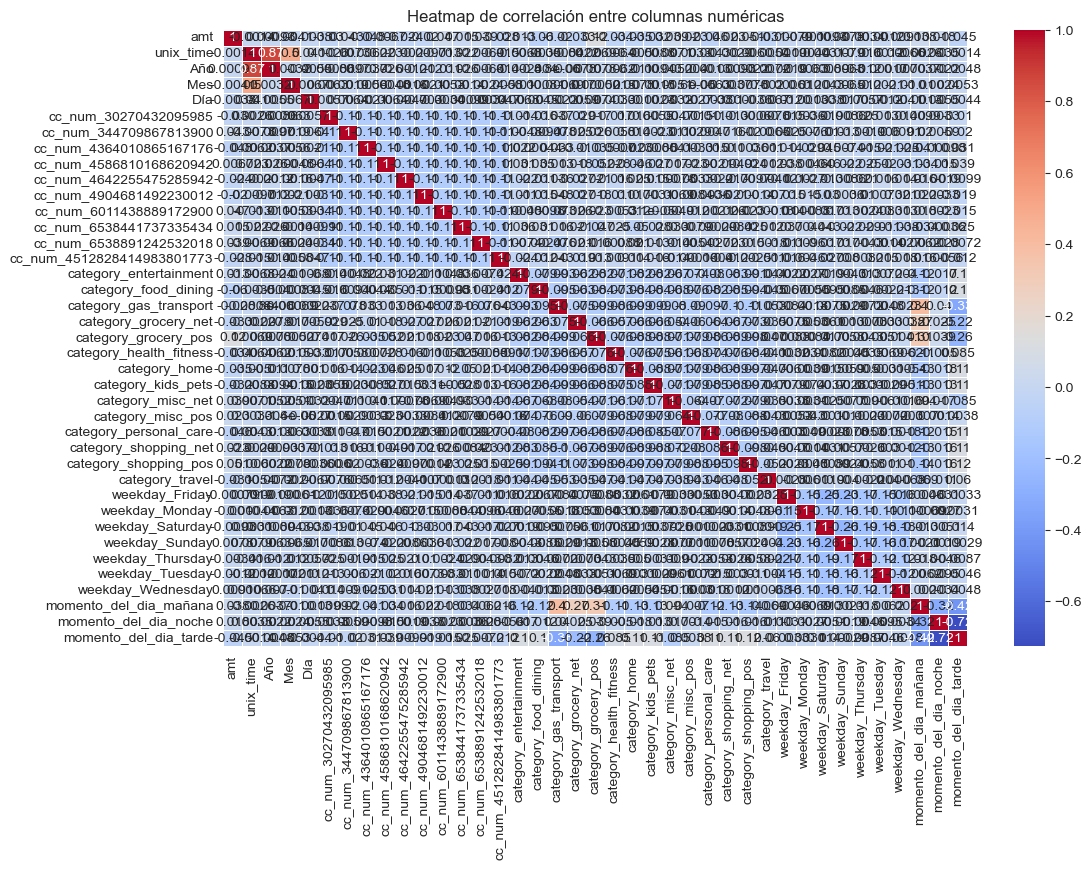

In [34]:
corr_matrix = dfv_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de correlación entre columnas numéricas")
plt.show()

## <font color=#252973>5. Exploración y selección de modelos</font><a name="modelos">

### <font color=#d42f33>División del dataframe

Vamos a dividir el dataframe en los conjuntos de entrenamiento y prueba y posterior validación. Vamos a separar los datos en 3. El 85% para entrenar y testear. Y del 85%, el 20% para testear.

In [35]:
# Dividimos los datos en entrenamiento/prueba (85%) y validación (15%)
train_test_data, valid_data = train_test_split(dfv_dum, test_size=0.15, random_state=42)

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
train_data, test_data = train_test_split(train_test_data, test_size=0.20, random_state=42)

# Eliminamos las columnas 'suburb', 'Date' y 'propoType' mientras guardamos 'sellPrice' como variable objetivo
# Para el conjunto de entrenamiento
X_train = train_data.drop(['amt', 'trans_num', 'merchant', 'Hora'], axis=1)
y_train = train_data['amt']

# Para el conjunto de prueba
X_test = test_data.drop(['amt', 'trans_num', 'merchant', 'Hora'], axis=1)
y_test = test_data['amt']

# Para el conjunto de validación
X_valid = valid_data.drop(['amt', 'trans_num', 'merchant', 'Hora'], axis=1)
y_valid = valid_data['amt']

# Mostramos las dimensiones de cada conjunto
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Validation data shape: {X_valid.shape}")

Train data shape: (29827, 38)
Test data shape: (7457, 38)
Validation data shape: (6580, 38)


### <font color=#d42f33>Modelos de regresión

#### <font color=#f0ba19>Definición de modelos

In [36]:
# Función para evaluar un modelo    
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, rmse, mae

Creamos una lista de modelos, porque queremos ver cuál de los distintos que hay es el que mejor se ajusta a nuestro conjunto de datos. Y vamos a comprobar cómo van con los dos modelos que hemos utilizado para identificar los outliers.

In [37]:
# Lista de modelos
categorical_column = [5]

modelos = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('K-Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('XGBoost Regression', XGBRegressor(categorical_features=categorical_column)),
    ('HistGradient Boosting Regression', HistGradientBoostingRegressor(categorical_features=categorical_column))
]

In [38]:
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [39]:
%%time

# Entrenamos y evaluamos cada modelo
for m, modelo in modelos:
    print(f"Probando modelo {m}")
    modelo.fit(X_train_standard, y_train)

# Evaluamos los modelos y almacenamos los resultados
results = {}
for nombre, modelo in modelos:
    r2, mse, rmse, mae = evaluate_model(modelo, X_test_standard, y_test)
    results[nombre] = {"R^2": r2, "MSE": mse, "RMSE": rmse, "MAE": mae}

# Creamos un dataframe con los resultados
df_Mod = pd.DataFrame(results).T

df_Mod

Probando modelo Linear Regression
Probando modelo Ridge Regression
Probando modelo Lasso Regression
Probando modelo Decision Tree Regression
Probando modelo Random Forest Regression
Probando modelo Gradient Boosting Regression
Probando modelo K-Neighbors Regression
Probando modelo Neural Network Regression
Probando modelo XGBoost Regression
Probando modelo HistGradient Boosting Regression
CPU times: user 2min 1s, sys: 19.3 s, total: 2min 20s
Wall time: 57.5 s


,R^2,MSE,RMSE,MAE
Linear Regression,0.052047,14846.292820,121.845364,54.296888
Ridge Regression,0.052000,14847.035045,121.848410,54.286338
Lasso Regression,0.051238,14858.975975,121.897399,54.354728
Decision Tree Regression,-0.750961,27422.554360,165.597567,62.970004
Random Forest Regression,-0.134609,17769.602316,133.302672,54.685467
Gradient Boosting Regression,0.062255,14686.435020,121.187603,51.411372
K-Neighbors Regression,-0.130338,17702.703009,133.051505,53.126387
Neural Network Regression,0.056530,14776.091280,121.556947,51.161846
XGBoost Regression,-0.101350,17248.709491,131.334342,51.948042
HistGradient Boosting Regression,0.051304,14857.934196,121.893126,51.307058


In [40]:
df_Mod["MAE"].sort_values()

Neural Network Regression           51.161846
HistGradient Boosting Regression    51.307058
Gradient Boosting Regression        51.411372
XGBoost Regression                  51.948042
K-Neighbors Regression              53.126387
Ridge Regression                    54.286338
Linear Regression                   54.296888
Lasso Regression                    54.354728
Random Forest Regression            54.685467
Decision Tree Regression            62.970004
Name: MAE, dtype: float64

#### <font color=#f0ba19>Visualización de los modelos

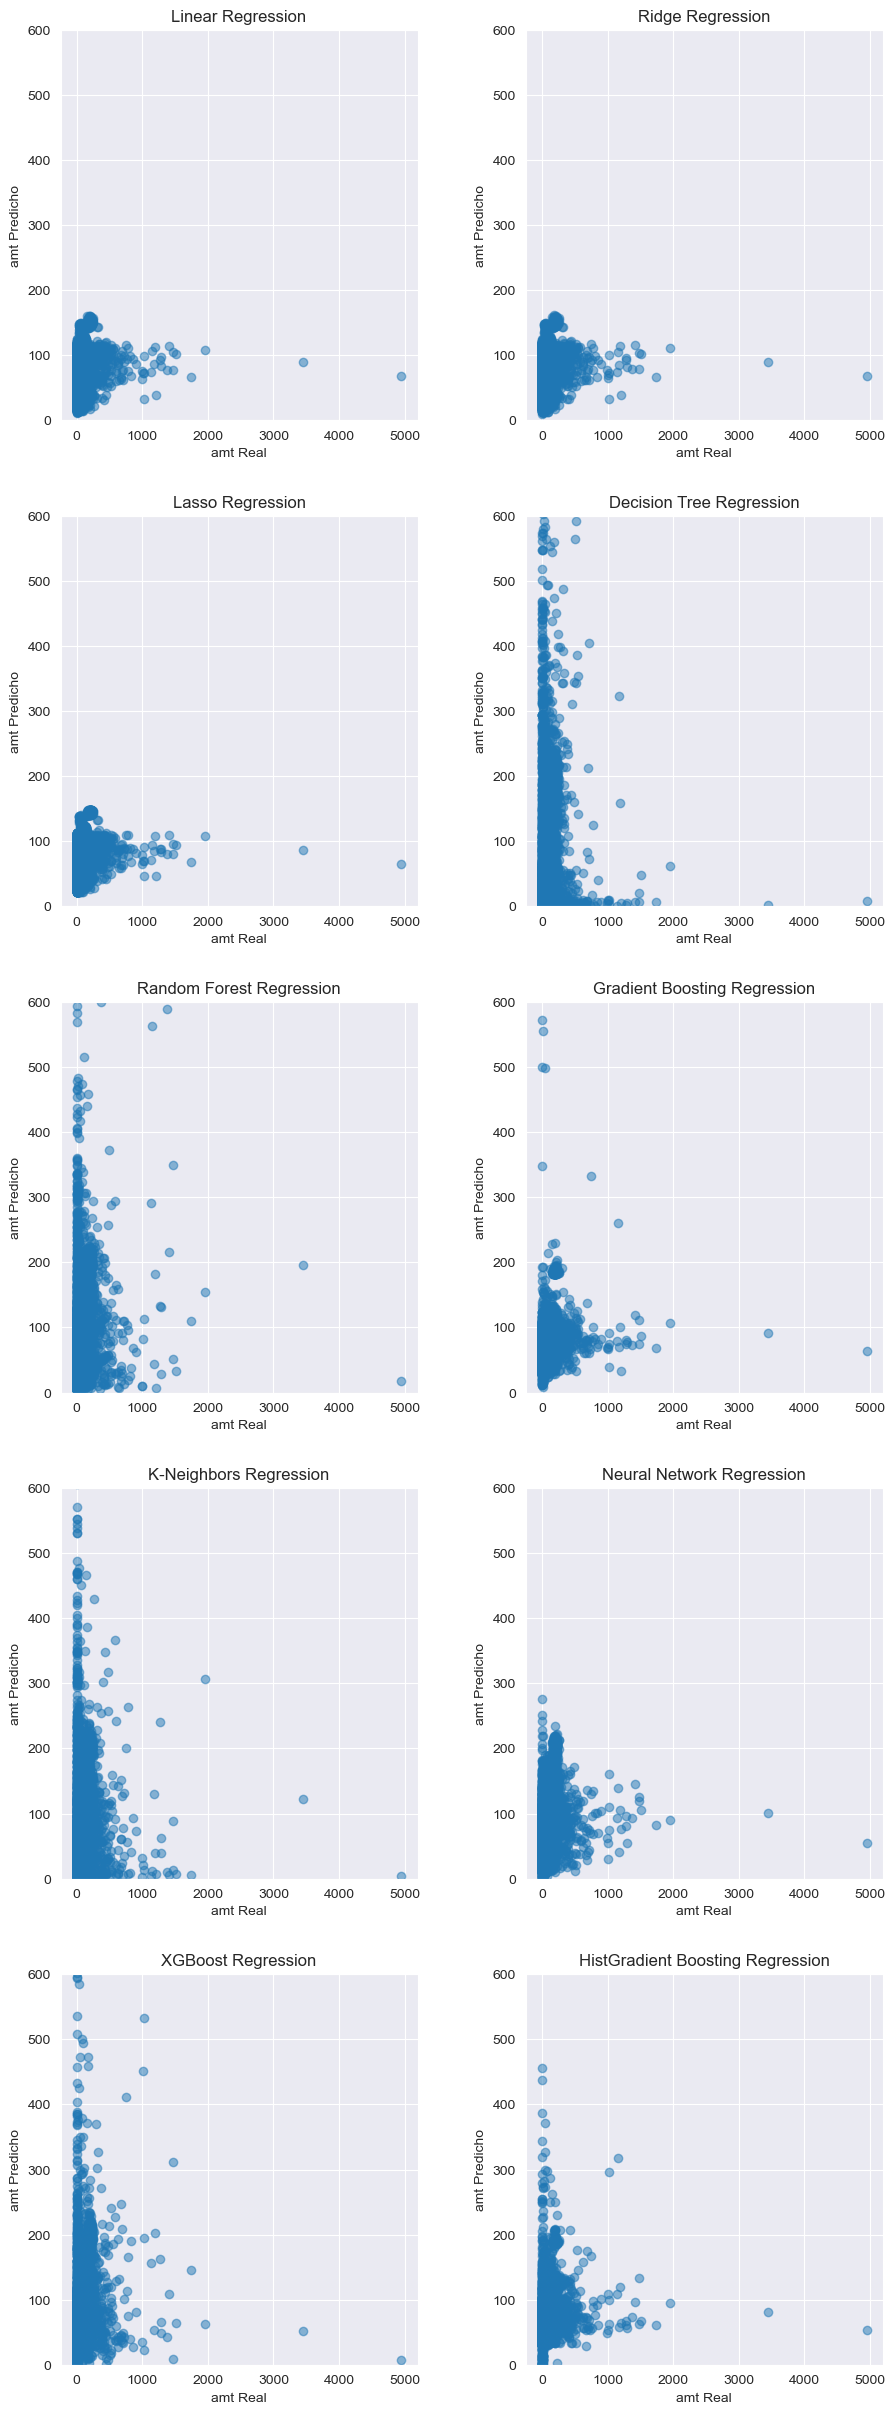

In [41]:
filas, columnas = 5, 2

fig, axs = plt.subplots(filas, columnas, figsize=(10, 25))
fig.tight_layout(pad=5.0)

# Iteramos a través de los modelos y creamos un gráfico de dispersión para cada uno
for idx, (nombre, modelo) in enumerate(modelos):
    fila_actual = idx // columnas
    columna_actual = idx % columnas
    ax = axs[fila_actual, columna_actual]

    # Calculamos las predicciones del modelo
    y_pred = modelo.predict(X_test_standard)

    # Dibujamos el gráfico de dispersión
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.set_title(nombre)
    ax.set_xlabel('amt Real')
    ax.set_ylabel('amt Predicho')
    ax.grid(True)
    ax.set_ylim(0, 600)

plt.show()

### <font color=#d42f33>Conclusiones

El principal problema con el que nos encontramos a la hora de trabajar este dataset es que no hay una correlación entre los datos y la cantidad a predecir. Lo que no immplica que no se pueda intentar más adelante poder trabajar con él.

## <font color=#252973>6. Visualización</font><a name="visualizacion">

Este modelo lo vamos a ver en una página web fuera del propio entorno de Jupyter, además de colgarlo en una página web.

El repositorio de la información será GitHub y la página la crearemos con Streamlit.

### <font color=#d42f33>GitHub

Para poder desarroolar el proyecto en GitHub vamos a elaborar un archivo con los requisitos que se requieren.

In [42]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
